In [8]:
import numpy as np
%matplotlib inline
from astropy import units
from astropy import constants
from astropy.table import Table
import matplotlib.pyplot as plt

from matplotlib.colors import LogNorm

COLOR = 'k'#'#FFFAF1'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['xtick.major.width'] = 1.5
plt.rcParams['ytick.major.width'] = 1.5
plt.rcParams['xtick.major.size']  = 5 #12
plt.rcParams['ytick.major.size']  = 5#12

plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['xtick.minor.size']  = 8
plt.rcParams['ytick.minor.size']  = 8

plt.rcParams['axes.linewidth'] = 1.5

plt.rcParams['text.color'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
#plt.rcParams['axes.spines.top'] = False
#plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['axes.edgecolor'] = COLOR
plt.rcParams['figure.facecolor'] = 'none'
plt.rcParams['legend.facecolor'] = 'none'
from matplotlib.gridspec import GridSpec



from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable

custom_colors = ['#153243', '#284b63',
                 '#4d7ea8', #'#90a9c7',
                 #'#a1b4cf',
                 '#b6c2d9',
                '#ffffff', '#f5f5f5', #'#DFE2DF', '#E5D7B6',
                  '#EBCC8C', '#F7B538',
                 '#DB7C26', '#D8572A','#780116']#, '#242325']

pmap = LinearSegmentedColormap.from_list('', custom_colors)
pmap.reversed();

AU= 1.496e8# km
from scipy.signal import argrelextrema

In [9]:
def getvmag(fname):
    data=np.genfromtxt(fname,skip_header=88,skip_footer=144,dtype='float')
    vmag=data[:,10]
    return(vmag)
vmag162667=getvmag('outputs/results_152667.txt')
data_152667_cartesian=np.genfromtxt('outputs/results_152667_cartesian.txt',skip_header=0,skip_footer=100,#,
                                dtype='str',delimiter='\n')
def getvmag_manual(fname):
    vmag_ar=[]
    elongation_ar=[]
    file = open(fname, 'r')
    ln=0
    while True:
        line = file.readline()
        #print(line)
        #print("linenumber",ln)
        ln+=1
        if(line[0:3].strip()=='20'):
            #print(line[68:76].strip())
            vmag_ar.append(float(line[68:76].strip()))
            #print(line[115:123].strip())
            elongation_ar.append(float(line[115:123].strip()))
        if not line:
            break
    return(np.array(vmag_ar),np.array(elongation_ar))
def read_cart(fname):
    date=[]
    x_ar=[]
    y_ar=[]
    z_ar=[]
    file = open(fname, 'r')
    count=0
    while True:
        line = file.readline()
        if not line:
            break
        count+=1
       
        if(line[0:3]=='246'):
    
            date.append(line[25:36])
        if(line[0:3].strip()=='X'):
            #print(line[56:80])
            #print(line[30:53])
            x_ar.append(float(line[4:26]))
            y_ar.append(float(line[30:53]))
            z_ar.append(float(line[56:80]))
            
    x_ar=np.array(x_ar)/AU
    y_ar=np.array(y_ar)/AU
    z_ar=np.array(z_ar)/AU
    r_ar=np.sqrt(x_ar*x_ar+y_ar*y_ar+z_ar*z_ar)
    return(r_ar,x_ar,y_ar,z_ar)
def getalldata(objid,vmaglim=23.,RH_lim=1.,elong_lim=60.):
    fname='outputs/results_'+str(objid)+'.txt'
    vmag,elongation=getvmag_manual(fname)
    fname_cart='outputs/results_'+str(objid)+'_cartesian.txt'
    RH,x_ar,y_ar,z_ar=read_cart(fname_cart)
    dater= np.arange(len(RH))#/365.
    #indxr=tuple([vmag<vmaglim] and [RH<RH_lim])
    indxr=np.where((vmag<vmaglim) & (RH<RH_lim) & (elongation>elong_lim))
    return(vmag,RH,indxr,dater)
#1998 FR11
vmag_152667,RH_152667,indx_152667,dater=getalldata(152667)
#139359
#2001 ME$_{1}$
vmag_139359,RH_139359,indx_139359,dater=getalldata(139359)
#452639
#2005 UY$_{6}$
vmag_452639,RH_452639,indx_452639,dater=getalldata(452639)

#3614980
#2012 UR$_{158}$

vmag_3614980,RH_3614980,indx_3614980,dater=getalldata(3614980)

#523599
#2003 RM
vmag_523599,RH_523599,indx_523599,dater=getalldata(523599)

#3297629
#2005 VL$_{1}$
vmag_3297629,RH_3297629,indx_3297629,dater=getalldata(3297629)

#3545552
#2010 RF$_{12}$
vmag_3545552,RH_3545552,indx_3545552,dater=getalldata(3545552)


#3012392
#1998 KY$_{26}$
vmag_3012392,RH_3012392,indx_3012392,dater=getalldata(3012392)

#3755347
#2016 NJ$_{33}$
vmag_3755347,RH_3755347,indx_3755347,dater=getalldata(3755347)

#3550888
#2010 VL$_{65}$

vmag_3550888,RH_3550888,indx_3550888,dater=getalldata(3550888)


#3625704	
#2013 BA$_{74}$
vmag_3625704,RH_3625704,indx_3625704,dater=getalldata(3625704)
#3403148	
#2006 RH$_{120}$
vmag_3403148,RH_3403148,indx_3403148,dater=getalldata(3403148)
#3752012	2016 GW$_{221}$
vmag_3752012,RH_3752012,indx_3752012,dater=getalldata(3752012)
#3654483	2013 XY$_{20}$
vmag_3654483,RH_3654483,indx_3654483,dater=getalldata(3654483)



In [11]:
def plot_obj(axs,objid,value,col,vmaglim1=23.,RH_lim1=1.,filled=True,peri_thresh=0.001):
    #139359
    #2001 ME$_{1}$
    sizer=10
    vmag,RH,indx,dater=getalldata(objid,vmaglim=vmaglim1,RH_lim=RH_lim1)
    if filled==True:
        
        axs.plot(dater[indx],value*np.ones_like(dater)[indx],
             '|', markeredgecolor=col, ms=sizer, color=col,alpha=0.99,
             markeredgewidth=1, zorder=1)
    else:
        sizer=20
        axs.plot(dater[indx],value*np.ones_like(dater)[indx],
             '|', markeredgecolor=col, ms=sizer, color=col,alpha=0.99,
             markeredgewidth=0.1, zorder=0)
    

    #print(np.where(np.abs(RH-min(RH))<0.0008))
        #ind_per=np.where(np.abs(RH-min(RH))<peri_thresh)
        ind_per=argrelextrema(RH, np.less)
        #axs[0].plot(dater[ind_per],RH[ind_per],'X',color='none',ms=12,
         #       markeredgecolor='k',markeredgewidth=1.)
        axs.plot(dater[ind_per],value*np.ones_like(dater)[ind_per],'x',color='k',ms=7,
                markeredgecolor='k',markeredgewidth=.5)
    return(axs)

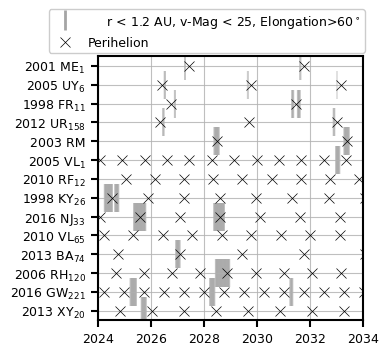

In [17]:
cm = 1/2.54  # centimeters in inches
fig, axs = plt.subplots(1, 1, tight_layout=False,figsize=(8.7*cm,8.7*cm),sharex=False,sharey=False
                       ,gridspec_kw={'hspace': 0.35, 'wspace': 0.3})
col='deepskyblue'

sizer=15

#139359
#2001 ME$_{1}$

plot_obj(axs,139359,1.04,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.05)

#452639
#2005 UY$_{6}$

plot_obj(axs,452639,1.02,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#plot_obj(axs,452639,1.02,'#ff7477')

#1998 FR11
#plot_obj(axs,152667,1.0,'#ff7477')
plot_obj(axs,152667,1.0,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.01)

#3614980
#2012 UR$_{158}$

#plot_obj(axs,3614980,0.98,'#ff7477')
plot_obj(axs,3614980,0.98,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#523599
#2003 RM
#plot_obj(axs,523599,0.96,'#ff7477')
plot_obj(axs,523599,0.96,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.01)

#3297629
#2005 VL$_{1}$

#plot_obj(axs,3297629,0.94,'#ff7477')
plot_obj(axs,3297629,0.94,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.005)


#3545552
#2010 RF$_{12}$
#plot_obj(axs,3545552,0.92,'#ff7477')
plot_obj(axs,3545552,0.92,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#3012392
#1998 KY$_{26}$
#plot_obj(axs,3012392,0.9,'#ff7477')

plot_obj(axs,3012392,0.9,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#3755347
#2016 NJ$_{33}$
#plot_obj(axs,3755347,0.88,'#ff7477')

plot_obj(axs,3755347,0.88,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#3550888
#2010 VL$_{65}$
#plot_obj(axs,3550888,0.86,'#ff7477')

plot_obj(axs,3550888,0.86,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)

#3625704	
#2013 BA$_{74}$
#plot_obj(axs,3625704,0.84,'#ff7477')

plot_obj(axs,3625704,0.84,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.01)

#3403148	
#2006 RH$_{120}$
#plot_obj(axs,3403148,0.82,'#ff7477')

plot_obj(axs,3403148,0.82,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.032)

#3752012	2016 GW$_{221}$
#plot_obj(axs,3752012,0.8,'#ff7477')

plot_obj(axs,3752012,0.8,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False,peri_thresh=0.01)

#3654483	2013 XY$_{20}$
#plot_obj(axs,3654483,0.78,'#ff7477')


plot_obj(axs,3654483,0.78,'#a5a5a5',vmaglim1=25.,RH_lim1=1.2,filled=False)
axs.plot(dater[indx_3654483],0.78*np.ones_like(dater)[indx_3654483],
         '|', markeredgecolor='#a5a5a5', ms=sizer, color='#a5a5a5',
         markeredgewidth=2, zorder=0,label=r'     r < 1.2 AU, v-Mag < 25, Elongation>60$^\circ$')

axs.plot([0],[0],'x',color='k',ms=7,
         markeredgecolor='k',markeredgewidth=.5,label='Perihelion')


axs.grid(alpha=0.8)

axs.set_xticks([0,2*365,365*4,365*6,365.*8,365.*10])

axs.set_xticklabels(['2024','2026','2028','2030','2032','2034'],rotation=0)

axs.set_yticks([1.04, 1.02,1.,0.98,0.96,0.94,0.92,0.9,0.88,0.86,0.84,0.82,0.8,0.78])
axs.set_yticklabels([r'2001 ME$_{1}$','2005 UY$_{6}$','1998 FR$_{11}$',r'2012 UR$_{158}$',
                     r'2003 RM',r'2005 VL$_{1}$',r'2010 RF$_{12}$',r'1998 KY$_{26}$',
                    r'2016 NJ$_{33}$','2010 VL$_{65}$','2013 BA$_{74}$'
                    ,r'2006 RH$_{120}$',r'2016 GW$_{221}$',r'2013 XY$_{20}$'],rotation=0)

axs.set_ylim(0.77,1.05)
axs.set_xlim(0,10*365)
axs.legend(fancybox=True, framealpha=1, shadow=False, borderpad=.3,bbox_to_anchor=(1.03,0.99),
            frameon=True, loc='lower right', ncol=1)#,prop={'size': 16},facecolor='none')
plt.savefig('Figure10_Observability_Vector.pdf',
            format='pdf',bbox_inches='tight', dpi=600)



#plt.savefig('Figures/alldarkcomets_observabilityv3',bbox_inches='tight', dpi=300)
